In [ ]:
Andre Londono

# Workshop 6: Numerical differentiation and integration

The lecture this week introduced you to the first application of numerical techniques. We will explore the applications to Python in this workshop. 

## Numerical differentiation

First, let's do differentiation "by hand" using loops, which is illustrative. Some examples borrowed (and modified) from http://gilgamesh.cheme.cmu.edu/doc/software/jacapo/9-numerics/9.1-numpy

These are examples of the "brute force" differentiation. They work well for a smooth vector, i.e. if there is not much "noise" on top of the function you are trying to differentiate. 

In [2]:
from pylab import *  # imports numpy, scipy, and matplotlib (convenient)
%matplotlib inline

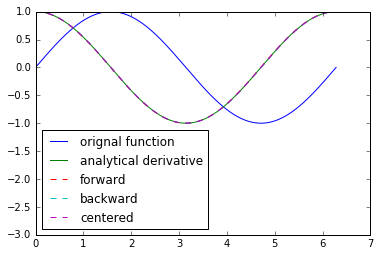

In [3]:
x = np.linspace(0,2*pi,1000)
y = sin(x)
dy_analytical = cos(x)


# lets use a forward difference method:
# that works up until the last point, where there is not
# a forward difference to use. there, we use a backward difference.

dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

# and now a backwards difference

dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

# and now, a centered formula
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

# compare the methods

plot(x,y,label='orignal function')
plot(x,dy_analytical,label='analytical derivative')
plot(x,dyf,'--',label='forward')
plot(x,dyb,'--',label='backward')
plot(x,dyc,'--',label='centered')
ylim(-3,1)
legend(loc='lower left')
show()

### Exercise 1
1. Plot the ratios of each numerical derivative to the analytical formula. Which method is most accurate ? 
1. Vary the number of points in the vector representing the original function (try 10, 100, 1000 steps). How does the precision change ? 

/Users/andre/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


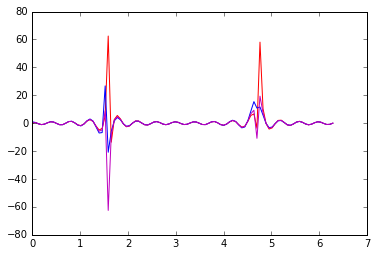

As the step sizes increases the ratio of the analytical derivative to the numerical derivative becomes more defined


In [1]:
from pylab import * 
%matplotlib inline

x = np.linspace(0,2*pi,100)
y = sin(x)
dy_analytical = cos(x)

dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

# and now a backwards difference

ratioF = [0.0]*len(x)
for i in range(len(y)-1):
    ratioF[i] = cos(i)/dyf[i]

dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])
    
ratioB = [0.0]*len(x)
for i in range(1,len(y)):
    ratioB[i] = cos(i)/dyb[i]
#print ratioB

    

# and now, a centered formula
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

ratioC = [0.0]*len(x)
for i in range(1, len(y)-1):
    ratioC[i] = cos(i)/dyc[i]


plt.plot(x, ratioB, 'r')
plt.plot(x, ratioF, 'b')
plt.plot(x, ratioC, 'm')

plt.show()

print "As the step sizes increases the ratio of the analytical derivative to the numerical derivative becomes more defined"

# compare the methods

Loops are usually "expensive" in Python, i.e. they take a lot of computational time to process. Numpy offers some vectorized methods that allow us to compute derivatives without Python loops (i.e. loops are done internally, in a highly optimized code). This comes at the cost of a more obscure syntax:

In [4]:
x = np.linspace(0,2*pi,1000)
y = sin(x)
dy_analytical = cos(x)

# we need to specify the size of dy ahead because diff returns
# an array of n-1 elements
dy = zeros(y.shape,float) # we know it will be this size
dy[0:-1] = diff(y)/np.diff(x)
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])


# calculate dy by center differencing using array slices

dy2 = np.zeros(y.shape,float) #we know it will be this size
dy2[1:-1] = (y[2:] - y[0:-2])/(x[2:] - x[0:-2])
dy2[0] = (y[1]-y[0])/(x[1]-x[0])
dy2[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

plot(x,y,label='orignal function')
plot(x,dy_analytical,label='analytical derivative')
plot(x,dy,label='forward diff')
plot(x,dy2,'k--',lw=2,label='centered diff')
ylim(-2.5,1)
legend(loc='lower left')
show()


SciPy offers a library function to compute derivatives along the lines of the code you just did. Here is an example of its use. See full documentation at http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

In [5]:
from scipy.misc import derivative

print derivative(func=sin, x0=pi, dx=1e-6, n=1, order=3)

-1.00000000014


### Exercise 2

1. Compare the precision *scipy.misc.derivative* function to your "centered diff" calculation above. Vary parameters *dx* and *order* to see 
1. Vary parameter *n* (order of the derivative). Does the calculation of the n-th derivative behave like what you'd expect ? 

In [5]:
from pylab import *
from scipy.misc import derivative
%matplotlib inline
x = np.linspace(0,2*pi,1000)
y = sin(x)
dy_analytical = cos(x)


dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])


dyscipy = [0.0]*len(x)
difference = [0.0]*len(x)
for i in range(0,1000):
    dyscipy[i] = derivative(func = sin, x0 = i, dx=1e-6, n=1, order =3)
    difference[i] = (dyscipy[i]-dyc[i])
    

plt.plot(x, difference , 'r')


If your data are very noisy, numerical errors on computed derivatives will be large; derivatives tend to magnify noise. In these cases, you have to employ smoothing techniques, either implicitly by using a multipoint derivative formula, or explicitly by smoothing the data yourself, or taking the derivative of a function that has been fit to the data in the neighborhood you are interested in.

Here is an example of a 4-point centered difference of some noisy data (courtesy http://gilgamesh.cheme.cmu.edu/doc/software/jacapo/9-numerics/9.1-numpy/9.2-integration.html#numerical-differentiation):

In [6]:
x = linspace(0,2*np.pi,100)
y = sin(x) + 0.1*random(size=x.shape)
dy_analytical = cos(x)

#2-point formula
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

'''
calculate dy by 4-point center differencing using array slices

\frac{y[i-2] - 8y[i-1] + 8[i+1] - y[i+2]}{12h}

y[0] and y[1] must be defined by lower order methods
and y[-1] and y[-2] must be defined by lower order methods
'''

dy = zeros(y.shape,float) #we know it will be this size
h = x[1]-x[0] #this assumes the points are evenely spaced!
dy[2:-2] = (y[0:-4] - 8*y[1:-3] + 8*y[3:-1] - y[4:])/(12.*h)

dy[0] = (y[1]-y[0])/(x[1]-x[0])
dy[1] = (y[2]-y[1])/(x[2]-x[1])
dy[-2] = (y[-2] - y[-3])/(x[-2] - x[-3])
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])


plot(x,y,label='orignal function')
plot(x,dy_analytical,label='analytical derivative')
plot(x,dyf,'r-',label='2pt-forward diff')
plot(x,dy,'k--',lw=2,label='4pt-centered diff')
ylim(-5,2)
legend(loc='lower left')
show()


## Numerical integration

Material borrowed and modified from http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html

When a function cannot be integrated analytically, or is very difficult to integrate analytically, one generally turns to numerical integration methods. SciPy has a number of routines for performing numerical integration. Most of them are found in the same scipy.integrate library. See http://docs.scipy.org/doc/scipy-0.14.0/reference/integrate.html for the full reference and documentation


### Single integration

The function *quad* is the workhorse of SciPy’s integration functions. Numerical integration is sometimes called quadrature (see lecture notes), hence the name. It is normally the default choice for performing single integrals of a function $f(x)$ over a given fixed range from $a$ to $b$:

$$\int_a^b f(x) dx$$

The general form of *quad* is *scipy.integrate.quad(f, a, b)*, where *f* is the name of the function to be integrated and *a* and *b* are the lower and upper limits, respectively. The routine uses adaptive quadrature methods to numerically evaluate integrals, meaning it successively refines the subintervals (makes them smaller) until a desired level of numerical precision is achieved. For the quad routine, this is about 1e-8, although it usually does even better.

As an example, let’s integrate a Gaussian function over the range from $-1$ to $1$

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

We first need to define the function $f(x)=e^{-x^2/2}/\sqrt{2\pi}$, which we do using a *lambda* expression, and then we call the function *quad* to perform the integration.


In [7]:
import scipy.integrate

f = lambda x : exp(-x**2/2)/sqrt(2*pi)
print scipy.integrate.quad(f, -1, 1)


(0.682689492137086, 7.579375928402476e-15)


### Exercise 3

Compare the value to the known central quantile of the Gaussian distribution

In [10]:
import scipy.integrate
#analytic indefinite integral of exp(-x**2/2)/sqrt(2*pi) is erf(1/root(2)) which is approx .6826894921370858971

f = lambda x : exp(-x**2/2)/sqrt(2*pi)
a=scipy.integrate.quad(f, -1, 1)
print .682689492137086-.682689492137085

print 'The quadrature method is very accurate to the actual integral'

9.99200722163e-16


The function call *scipy.integrate.quad(f, 0, 1)* returns a tuple of two numbers. The first is 0.6826..., which is the value of the integral, and the second is 7.57...e-15, which is an estimate of the absolute error in the value of the integral. The estimated precision is very good ! 

Because *quad* requires a callable object (e.g. a function name) as its first argument, we have to define this function first. We could use the usual *def* statement to create a normal function, and then use the name of that function in *quad*. However, it’s simpler here to use a *lambda* expression. In fact, we can just put the *lambda* expression directly into the first argument, as illustrated here


In [8]:
import scipy
from scipy.integrate import quad, quadrature, fixed_quad

In [9]:
print scipy.integrate.fixed_quad(lambda x : exp(-x**2/2)/sqrt(2*pi), -1, 1)

(0.68268973538821909, None)


Note: *quad* accepts $\pm\infty$ as arguments:

In [10]:
print scipy.integrate.quad(lambda x : exp(-x**2/2)/sqrt(2*pi), -inf, +inf)

(0.9999999999999998, 1.0178191320905743e-08)


### Exercise 4

Compare precision and execution time of functions *quad*, *fixed_quad*, and *quadrature*

In [20]:
import scipy
import time
from scipy.integrate import quad, quadrature, fixed_quad
start_time = time.time()
print "Fixed Quad:", "\n",scipy.integrate.fixed_quad(lambda x : exp(-x**2/2)/sqrt(2*pi), -1, 1) , (" %s seconds " % (time.time() - start_time))


start_time1 = time.time()
print 'Quad:',"\n", scipy.integrate.quad(lambda x : exp(-x**2/2)/sqrt(2*pi), -1,1),  (" %s seconds " % (time.time() - start_time1))

start_time2 = time.time()
print 'Quadrature:', '\n', scipy.integrate.quadrature(lambda x: exp(-x**2/2)/sqrt(2*pi), -1,1), (" %s seconds " % (time.time() - start_time2))



Fixed Quad: 
(0.68268973538821909, None)  0.000340938568115 seconds 
Quad: 
(0.682689492137086, 7.579375928402476e-15)  0.000367164611816 seconds 
Quadrature: 
(0.68268949222807573, 5.1746900098237347e-09)  0.000686168670654 seconds 


### Integrating sampled data

If you have a fixed array of samples, you can use *scipy.integrate.cumtrapz*, *scipy.integrate.simps*, or *scipy.integrate.romb* to integrate them (using trapezoid, Simpson, and Romberg rules, respectively). 

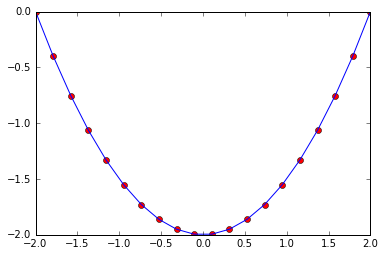

In [11]:
from scipy import integrate
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, num=20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()


### Exercise 5

Compute a numerical integral 

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

using an array of 10,100, and 1000 samples, and trapezoid and Simpson methods; compare the precision of the integral to what *quad* returns. 

In [53]:
import scipy
from scipy.integrate import quad, quadrature, fixed_quad
from scipy import integrate

f = lambda x : exp(-x**2/2)/sqrt(2*pi)

print scipy.integrate.quad(f, -1, 1)

x0 = np.linspace(-1,1, num = 10)
x1 = np.linspace(-1, 1, num=100)
x2 = np.linspace(-1,1, num = 1000)

y = exp(-x0**2/2)/sqrt(2*pi)
y2 = exp(-x1**2/2)/sqrt(2*pi)
y3= exp(-x2**2/2)/sqrt(2*pi)

t1 = scipy.integrate.cumtrapz(y, x0, initial=0)
t2 = scipy.integrate.cumtrapz(y2, x1, initial = 0)
t3 = scipy.integrate.cumtrapz(y3, x2, initial = 0)
print "Trapezoid integration method with array 10, 100, 1000: " ,"\n", t1[t1.size-1], t2[t2.size-1], t3[t3.size-1]


s1 = scipy.integrate.simps(y, x0)
s2 = scipy.integrate.simps(y2, x1)
s3 = scipy.integrate.simps(y3, x2)
print "Simpsons of array 10, 100, 1000: ","\n", s1, s2, s3



#r1 = scipy.integrate.romb(y, x0)
#print "Romberg of array 10: ", r1







(0.682689492137086, 7.579375928402476e-15)
Trapezoid integration method with array 10, 100, 1000:  
0.680694673693 0.682673032999 0.6826893305
Simpsons of array 10, 100, 1000:  
0.682651864375 0.682689489663 0.682689492137


ValueError: Number of samples must be one plus a non-negative power of 2.